Trong cuộc sống, để giao tiếp với nhau, chúng ta thường sử dụng lời nói, cử chỉ hoặc hành động. Và cuộc giao tiếp đó được gọi là thành công khi người nó có thể diễn đạt được toàn bộ ý nghĩa, mong muốn của mình, còn người nghe có thể hiểu được những gì mà người nói muốn truyền đạt đến. Một trong những công cụ hiệu quả nhất, phổ biến nhất mà con người dùng để giao tiếp với nhau, đó là **ngôn ngữ**, cụ thể ở đây là **ngôn ngữ tự nhiên**. 

> Ngôn ngữ tự nhiên (natural language) là một thuật ngữ có thể được hiểu theo nhiều cách khác nhau, nhưng giới hạn trong học máy, bạn có thể hiểu ngắn gọn như sau : 
+ Văn bản (Text) : dưới dạng chữ viết như email, status, bài báo...
+ Giọng nói (Speech) : Thể hiện dưới dạng âm thanh bằng ngôn ngữ của người nói như đoạn ghi âm, hội thoại, giao tiếp qua lời nói...
>
> Cả 2 loại này thường được gọi là chuỗi *(sequence)* (trong văn bản một câu là một chuỗi nhiều từ với nhau). Vì vậy, một thuật ngữ chung mà bạn sẽ gặp trong xử lý ngôn ngữ tự nhiên (NLP) là *seq2seq*, hay nói khác đi, tìm thông tin trong một chuỗi để tạo ra chuỗi khác (ví dụ: chuyển đổi một câu thoại thành một chuỗi các bước dựa trên văn bản). 

Trong Machine learning, mục đích của việc sử dụng ngôn ngữ tự nhiên để xử lý một vấn đề nào đó rất đa dạng. VD : kiểm tra xem email đó có spam hay không hay status của người đó đang đề cập đến chủ đề gì, có đúng theo tiêu chuẩn cộng đồng hay không...

Để thực hành NLP trong TensorFlow, chúng ta sẽ thực hành các bước mà chúng ta đã sử dụng trước đây nhưng lần này áp dụng với dữ liệu văn bản:

`Văn bản -> Chuyển thành kiểu số -> Xây dựng mô hình -> Đánh giá mô hình -> Cải thiện mô hình -> Dự đoán` 

![](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/08-example-nlp-problems.png)
*Một số vấn đề ví dụ về xử lý ngôn ngữ tự nhiên (NLP) và hiểu ngôn ngữ tự nhiên (NLU). Đây cũng thường được gọi là các bài toán trình tự (đi từ trình tự này sang trình tự khác).*

> 📖 Nguồn tham khảo : Để có cái nhìn tổng quan về NLP và các vấn đề khác nhau bên trong nó, hãy đọc bài viết [*A Simple Introduction to Natural Language Processing*](https://becominghuman.ai/a-simple-introduction-to-natural-language-processing-ea66a1747b32).

Trong module này, chúng ta sẽ xây dựng mô hình nhận diện một status nào đó trên Twitter có đề cập đến thảm họa thiên nhiên hay không.

Nội dung bài viết gồm :  

1. Download và kiểm tra tập dữ liệu
2. Khám phá tách dữ liệu
3. Chuyển dữ liệu văn bản thành dữ liệu được mã hóa bằng các token
4. Chuyển văn bản được mã hóa thành một bản nhúng
5. Khởi tạo mô hình và train 
  * **Model 0**: Naive Bayes (baseline)
  * **Model 1**: Feed-forward neural network (dense model)
  * Giới thiệu về Recurrent Neural Networks (RNN's)
  * **Model 2**: LSTM model
  * **Model 3**: GRU model
  * **Model 4**: Bidirectional-LSTM model
  * **Model 5**: 1D Convolutional Neural Network
  * **Model 6**: TensorFlow Hub Pretrained Feature Extractor
  * **Model 7**: Same as model 6 with 10% of training data
6. So sánh hiệu quả của các mô hình
7. Tìm những dự đoán sai lớn nhất
8. Dự đoán với dữ liệu test

## 1. Download và kiểm tra tập dữ liệu

Tải tập dữ liệu các đoạn status trên Twitter

In [1]:
!wget https://www.dropbox.com/s/550c578hlcjcrf8/nlp-getting-started.zip

--2021-09-22 07:29:17--  https://www.dropbox.com/s/550c578hlcjcrf8/nlp-getting-started.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/550c578hlcjcrf8/nlp-getting-started.zip [following]
--2021-09-22 07:29:17--  https://www.dropbox.com/s/raw/550c578hlcjcrf8/nlp-getting-started.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc5689f373410491b8f1b0d4d155.dl.dropboxusercontent.com/cd/0/inline/BWrz4MATcGnszJVT4bkdfYCTPmE8l0e290QtwIsxc_hGzzjmnpvEQL69qfAHJSatRbTQQhX0jeHMFYppZlUh4jfRWbS04NBByyqda4lJSYSmKm7xMBszyBSgLyQvsfcXeCVOm7MfirjIBUwTsP5AenOY/file# [following]
--2021-09-22 07:29:18--  https://uc5689f373410491b8f1b0d4d155.dl.dropboxusercontent.com/cd/0/inline/BWrz4MATcGnszJVT4bkdfYCTPmE8l0e290QtwIsxc_hGzzjmnpvEQL69q

Tải `utility_function.py` đã được sử dụng ở những bài trước.

In [2]:
!wget https://www.dropbox.com/s/v4sla7jvi9cltg8/utility_functions.py

--2021-09-22 07:29:19--  https://www.dropbox.com/s/v4sla7jvi9cltg8/utility_functions.py
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/v4sla7jvi9cltg8/utility_functions.py [following]
--2021-09-22 07:29:19--  https://www.dropbox.com/s/raw/v4sla7jvi9cltg8/utility_functions.py
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucbc523a2493e04db471fd875e29.dl.dropboxusercontent.com/cd/0/inline/BWr4TK1T5EZlcbBOI7VXr8q_Lyz3O7LR36lgQsxTnu9XYzV0DFCKxPr3TxxY1BkN69h8Pr8vE0Ynh8ftHKlfIxccV0nAlnzOBZfPmCC2Kzn72bPd_NEMKixBb0B-9bidxocfcLq6ABOil7uRmfOrKDw_/file# [following]
--2021-09-22 07:29:19--  https://ucbc523a2493e04db471fd875e29.dl.dropboxusercontent.com/cd/0/inline/BWr4TK1T5EZlcbBOI7VXr8q_Lyz3O7LR36lgQsxTnu9XYzV0DFCKxPr3TxxY1BkN69

In [3]:
!ls 

nlp-getting-started.zip  sample_data  utility_functions.py


`nlp-getting-started.zip` và `utility_functions.py` đã được tải xuống!! 

## 2. Khám phá, tách dữ liệu

### Khám phá dữ liệu

Trước tiên, chúng ta cần giải nén tập tin được tải về. Sử dụng `unzip_file()` trong `utility_functions.py` để thực hiện: 

In [4]:
from utility_functions import walk_through_directory, unzip_file

In [5]:
import os 
unzip_file("nlp-getting-started.zip")

Unzipped file


In [6]:
!ls

nlp-getting-started.zip  sample_data		test.csv   utility_functions.py
__pycache__		 sample_submission.csv	train.csv


Trong tập dữ liệu vừa được giải nén, có thể thấy một số file `test.csv`, `train.csv`, `sample_submission.csv`. Trong đó, có 2 file bạn sẽ sử dụng để train mô hình là `train.csv` và `test.csv`, còn `sample_submission.csv` là mẫu để có thể apply dự thi trên `https://www.kaggle.com/c/nlp-getting-started`. 

Chúng ta sẽ sử dụng `pandas` để mở file.

In [7]:
import pandas as pd 

In [8]:
train_df = pd.read_csv("train.csv")
train_df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [145]:
test_df = pd.read_csv("test.csv")
test_df

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


Bạn có thấy sự khác biệt giữa `train_df` và `test_df` là gì không ? Trong `train_df` chúng ta thấy có sự xuất hiện cột `target`, còn `test_df` thì không. Như vậy chúng ta sẽ không sử dụng `test_df` để kiểm định mô hình được. Điều đó đồng nghĩa rằng chúng ta phải tách dữ liệu trong `train_df` thành 2 phần, một phần để train, một phần để kiểm định mô hình (validation). Việc này chúng ta sẽ làm sau. Tiếp theo, kiểm tra `target` của `train_df`

In [10]:
train_df["target"].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [11]:
print(f"Tổng số dữ liệu train : {len(train_df)}")
print(f"Tổng số dữ liệu test : {len(test_df)}")
print(f"Tổng số dữ : {len(train_df) + len(test_df)}")

Tổng số dữ liệu train : 7613
Tổng số dữ liệu test : 3263
Tổng số dữ : 10876


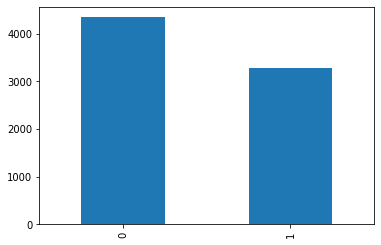

In [12]:
train_df["target"].value_counts().plot.bar()

`target` chỉ có 2 loại  là `0` và `1` giúp chúng ta có thể có một vài ý tưởng: 
+ Vấn đề nhị phân
+ `0` có nghĩa là không xảy ra thảm họa chiếm 4342 dữ liệu , chiếm ~57% dữ liệu.
+ `1` có nghĩa là có xảy ra thảm hòa chiếm 3271, chiếm ~43% dữ liệu.


Hiển thị text ngẫu nhiên kèm theo target của nó. 

In [13]:
import random 

random_index = random.randint(0,len(train_df) - 5 ) 
for row in train_df[["text", "target"]][random_index:random_index+5].itertuples() : 
  _, text, target = row 
  print(f"{'Xảy ra thảm họa' if target == 1 else 'Không xảy ra thảm họa'}")
  print(f"Text: {text}")
  print(f"\n==================================\n")

Xảy ra thảm họa
Text: Barbados #Bridgetown JAMAICA ÛÒ Two cars set ablaze: SANTA CRUZ ÛÓ Head of the St Elizabeth Police Superintende...  http://t.co/wDUEaj8Q4J


Không xảy ra thảm họa
Text: Ablaze for you Lord :D


Không xảy ra thảm họa
Text: Check these out: http://t.co/rOI2NSmEJJ http://t.co/3Tj8ZjiN21 http://t.co/YDUiXEfIpE http://t.co/LxTjc87KLS #nsfw


Không xảy ra thảm họa
Text: on the outside you're ablaze and alive
but you're dead inside


Không xảy ra thảm họa
Text: Had an awesome time visiting the CFC head office the ancop site and ablaze. Thanks to Tita Vida for taking care of us ??




### Tách dữ liệu 

Vì tập dữ liệu `test` không có label, nên chúng ta không thể làm bất cứ điều gì để train mô hình với nó. Dữ liệu `test` này sẽ chỉ được sử dụng ở phần cuối cùng, khi mọi thứ đã hoàn chỉnh, chúng ta tiến hành dự đoán và submit nếu cần thiết. 

Vì lẽ đó, chúng ta chỉ còn cách là tách dữ liệu `train` thành 2 phần để mô hình train sau đó nó sẽ tự kiểm định lại quá trình train của nó. Cụ thể, chúng ta sẽ sử dụng 85% dữ liệu để train, còn 15% dữ liệu còn lại để tiến hành kiểm định

`train_test_split` trong `sklearn.model_selection()` sẽ tách dữ liệu và đảo lộn thứ tự dữ liệu. 

In [14]:
from sklearn.model_selection import train_test_split

train_text, valid_text, train_target, valid_target = train_test_split(train_df["text"].values, 
                                                                      train_df["target"].values, 
                                                                      random_state=42, 
                                                                      train_size=0.85)

train_text.shape, valid_text.shape, train_target.shape, valid_target.shape

((6471,), (1142,), (6471,), (1142,))

In [15]:
print(f"Số dữ liệu train có xảy ra thảm họa : {sum(train_target)} ({sum(train_target) / len(train_target)*100:.2f}%)")
print(f"Số dữ liệu train không xảy ra thảm họa : {len(train_target) - sum(train_target)} ({(len(train_target) - sum(train_target)) / len(train_target) * 100:.2f}%)")
print(f"Số dữ liệu valid có xảy ra thảm họa : {sum(valid_target)} ({sum(valid_target) / len(valid_target)*100:.2f}%)")
print(f"Số dữ liệu valid không xảy ra thảm họa : {len(valid_target) - sum(valid_target)} ({(len(valid_target) - sum(valid_target)) / len(valid_target) * 100:.2f}%)")

Số dữ liệu train có xảy ra thảm họa : 2780 (42.96%)
Số dữ liệu train không xảy ra thảm họa : 3691 (57.04%)
Số dữ liệu valid có xảy ra thảm họa : 491 (42.99%)
Số dữ liệu valid không xảy ra thảm họa : 651 (57.01%)


## 3. Chuyển dữ liệu văn bản thành dữ liệu được mã hóa bằng các token

> **🤔 Câu hỏi**: Bạn nghĩ chúng ta phải làm gì trước khi có thể sử dụng thuật toán machine learning với dữ liệu văn bản của mình? Liệu machine learning có hiểu ngôn ngữ của con người không? 

Máy tính dĩ nhiên nó sẽ không hiểu con ngôn ngữ của con người, nhưng nó hiểu được những con số vì bản chất của học máy chính là tìm những điểm đặc biệt từ những con số đó. 

Trong NLP, có hai khái niệm chính để chuyển văn bản thành số:

+ **Tokenization** (Mã hóa thành các token):  Một phép ánh xạ thẳng các từ trong văn bản thành các ký tự. Có ba mức độ mã hóa chính : 
  + 1. Sử dụng **word-level tokenization** (Mã hóa từ) : chẳng hạn như `Today is a good day` thì `Today` là `0`, `is` là `1`, `a` là `2`, `good` là `3`, `day` là `4`. Mỗi từ trong câu được xem như một token duy nhất.
  + 2. Sử dụng **Character-level tokenization** (Mã hóa ký tự) : chuyển các chữ cái trong câu gồm các ký tự từ `a-z` thành định dạng 26 số. Trong trường hợp này, mọi ký tự trong một chuỗi được coi là một token duy nhất.
  + 3. Sử dụng **Sub-word tokenization** (Mã hóa từ phụ) : nằm giữa **word-level và character-level tokenization**. Nó liên quan đến việc chia nhỏ các từ vô nghĩa thành các phần nhỏ hơn và sau đó chuyển các phần nhỏ hơn đó thành số. Chẳng hạn như, "my favourite food is pineapple pizza" có thể trở thành "my, fav, avour, rite, fo, oo, od, is, pin, ine, app, le, piz, za". Các từ phụ này sau đó sẽ được ánh xạ tới một giá trị số. Trong trường hợp này, mỗi từ có thể được xem như token đa năng. 
+ **Embeddings** (Nhúng) : Phép nhúng là một biểu diễn của ngôn ngữ tự nhiên có thể học được dưới dạng một vector đặc trưng. Ví dụ: từ "dance" có thể được biểu thị bằng vectơ 5 chiều `[-0.8547, 0.4559, -0.3332, 0.9877, 0.1112]`. Điều quan trọng cần lưu ý ở đây, kích thước của vector đặc trưng có thể điều chỉnh được. Có hai cách để sử dụng nhúng:
  + 1. **Tạo riêng phép nhúng** : Khi văn bản của bạn đã được chuyển thành số (bắt buộc đối trước khi nhúng), bạn có thể đưa chúng qua một lớp nhúng (chẳng hạn như  [`tf.keras.layers.Embedding`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding) và biểu diễn nhúng sẽ được học trong quá trình train mô hình.
  + 2. **Tái sử dụng phép nhúng đã được train trước đó**: Nhiều phương pháp nhúng đã được train trước đó. Thông thường các phương pháp này được học trên các kho văn bản lớn (chẳng hạn như tất cả Wikipedia) và do đó có sự thể hiện tốt cơ bản của ngôn ngữ tự nhiên. Bạn có thể sử dụng phương pháp nhúng được train trước để khởi tạo mô hình của mình và tinh chỉnh nó cho phù hợp với từng việc cụ thể của riêng bạn.


![](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/08-tokenization-vs-embedding.png)
*Ví dụ về **tokenization** (ánh xạ thẳng từ từ sang số) và **nhúng** (thể hiện phong phú hơn các mối quan hệ giữa các mã thông báo).*

🤔 **Câu hỏi:** Tôi nên sử dụng mức độ mã hóa token nào? Tôi nên chọn cách nhúng nào?

Còn phụ thuộc vào vấn đề của bạn. Bạn có thể thử mã hóa/ nhúng một vài mức độ khác nhau và xem cái nào hoạt động tốt nhất. Bạn thậm chí có thể thử xếp chồng chúng (ví dụ: kết hợp đầu ra của các layer nhúng của bạn bằng cách sử dụng [`tf.keras.layers.concatenate`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/concatenate))

Để tìm kiếm mô hình đã được train trước đó, bạn có thể tham khảo tại đây, [Word2vec embeddings](http://jalammar.github.io/illustrated-word2vec/), [GloVe embeddings](https://nlp.stanford.edu/projects/glove/) và nhiều mô hình có sẵn khác trên [TensorFlow Hub](https://tfhub.dev/s?module-type=text-embedding).





### Vector hóa văn bản (mã hóa văn bản thành token)

Để vector hóa văn bản, chúng ta sẽ sử dụng [`tf.keras.layers.experimental.preprocessing.TextVectorization`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/TextVectorization)`. 

Trong layer `TextVectorization` gồm các tham số sau : 
+ `max_tokens` : Có tồi đa bao nhiêu từ mà bạn muốn để đưa vào trong danh sách từ vựng của toàn bộ văn bản. (VD: 30000 từ khác nhau trong văn bản) bao gồm một giá trị cho token OOV (out of vocabulary).
+ `standardize` : Phương thức để chuẩn hóa văn bản. Mặc định là `lower_and_strip_punctuation` để đưa tất cả chữ cái về chữ in thường và loại bỏ dấu chấm câu. 
+ `split` : Định nghĩa cách tách đoạn văn bản, mặc định `whitespace` để tách văn bản theo khoảng trắng. 
+ `ngrams` : Có bao nhiêu từ để chứa trên một lần tách token,VD : `ngrams=2` sẽ tách thành các chuỗi liên tục gồm 2 token
+ `output_mode` : Định nghĩa output của token sẽ như thế nào, có thể là `int`, `binary`, `count`, `tf-idf`...
+ `output_sequence_length`: Độ dài output của trình tự được mã hóa. VD nếu `output_sequence_length=150`, tất cả các chuỗi được mã hóa sẽ có độ dài là 150 token.
+ `pad_to_max_tokens` : Mặc định `False` , nếu đặt là `True`, đặc tính output sẽ được đệm vào `max_tokens`, ngay cả khi số lượng token duy nhất trong từ vựng ít hơn `max_tokens`. Chỉ hợp lệ trong một số chế độ nhất định



In [16]:
from tensorflow.keras.layers import TextVectorization

text_vectorizer = TextVectorization(max_tokens=None, # có bao nhiêu từ trong từ vựng (None dùng cho tất cả các từ khác nhau trong văn bản của bạn)
                                    standardize="lower_and_strip_punctuation", # cách xử lý văn bản
                                    split="whitespace", # Cách tách tokens
                                    ngrams=None, # Tạo nhóm gồm n từ
                                    output_mode="int", # cách ánh xạ token thành số
                                    output_sequence_length=None, # Trình tự output của các tokens nên dài bao nhiêu?
                                    pad_to_max_tokens=False # Không hợp lệ nếu sử dụng max_tokens=None
                                    ) 

Phần trên là cài đặt mặc định cho quá trình khởi tạo `TextVectorization`. Nhưng chúng ta sẽ cần cài đặt một số tham số cụ thể cho phù hợp với công việc hiện tại. Cụ thể, chúng ta sẽ thay đổi `max_tokens` và `output_sequence_length`. 

Với `max_tokens` (số lượng từ tối đa được lưu trong danh sách từ vựng để token), bội số của 10.000 (10.000, 20.000, 30.000) hoặc số từ duy nhất chính xác trong văn bản của bạn (ví dụ: 32,179) là các giá trị phổ biến. 

Trong trường hợp này, chúng ta sẽ sử dụng `30000` 

Còn `output_sequence_length`, chúng tôi sẽ sử dụng số lượng, chúng ta sẽ tìm số từ trung bình của một câu trong tập dữ liệu train. Đầu tiên chúng ta sẽ tìm tổng số từ trong một câu của tất cả các câu. 

In [17]:
import numpy as np

In [18]:
train_sentence_length = [len(sentence.split()) for sentence in train_text]
output_seq_length = np.round(np.mean(train_sentence_length))
output_seq_length

15.0

In [19]:
text_vectorizer = TextVectorization(
    max_tokens=30000, 
    output_mode="int",
    output_sequence_length=int(output_seq_length)
)

Để ánh xạ thực thể của `TextVectorization` là  `text_vectorizer` vào dữ liệu của, chúng ta có thể gọi phương thức `adapt()` và truyền dữ liệu train vào đó. 

In [20]:
text_vectorizer.adapt(train_text)

Dữ liệu train đã được ánh xạ! `text_vectorizer` đã lưu trữ những từ vựng từ các câu trong văn bản mà chúng ta truyền vào. 

In [21]:
import random
random_sentence = random.choice(train_text)
print(f"Câu ban đầu : {random_sentence}")
vectorized_sentence = text_vectorizer([random_sentence])
print(f"Câu được vector hóa: {vectorized_sentence}")
print(f"Hình dạng câu được vector hóa: {vectorized_sentence.shape}")

Câu ban đầu : Warne shocked over Australia's epic collapse at Trent Bridge: Johannesburg Aug 06 (ANI): Legendary Australian... http://t.co/LwwoJXtTIV
Câu được vector hóa: [[ 6597  8184    59  3952  2038   168    17  1284   424  5076   923  1659
  19477  4989  3953]]
Hình dạng câu được vector hóa: (1, 15)


## 4. Chuyển văn bản được mã hóa thành một bản nhúng

Văn bản đã được mã hóa thành các token, nhưng như vậy vẫn chưa thể đưa vào mô hình train được. Chúng ta cần thực hiện nhúng dữ liệu số này, có thể hiểu rõ hơn là thay vì đưa dữ liệu tĩnh vào mô hình (e.g. 1 = I, 2 = love, 3 = TensorFlow), nhúng có thể biểu diễn số của một từ có thể được cải thiện khi một mô hình đi qua các mẫu dữ liệu.

Chúng ta có thể thấy việc nhúng một từ trông như thế nào bằng cách sử dụng [`tf.keras.layers.Embedding`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding) layer.

Các tham số trong `Embbeding` : 
+ `input_dim` : Kích thước của từ vựng (ví dụ: len (`text_vectorizer.get_vocabulary()`).
+ `output_dim` : Kích thước output của vectơ nhúng, ví dụ, giá trị `100` sẽ xuất ra vectơ đặc trưng có kích thước 100 cho mỗi từ.
+ `embeddings_initializer` : Cách khởi tạo ma trận nhúng, mặc định là `uniform` cái mà ngẫu nhiên tạo ra ma trận nhúng với phân phối đều. Điều này có thể được thay đổi để sử dụng các phương pháp nhúng đã học trước.
+ `input_length` : Độ dài của các trình tự được chuyển đến layer nhúng.



In [22]:
from tensorflow.keras.layers import Embedding

text_embed = Embedding(input_dim=30000,
                       output_dim=128, 
                       input_length=int(output_seq_length))

In [23]:
print(f"Câu ban đầu : {random_sentence}")
vectorized_sentence = text_vectorizer([random_sentence])
print(f"Câu được vector hóa: {vectorized_sentence}")
print(f"Hình dạng câu được vector hóa: {vectorized_sentence.shape}")
embed_sentence = text_embed(vectorized_sentence)
print(f"Câu được nhúng : {embed_sentence}")
print(f"Kich thước câu được nhúng : {embed_sentence.shape}")

Câu ban đầu : Warne shocked over Australia's epic collapse at Trent Bridge: Johannesburg Aug 06 (ANI): Legendary Australian... http://t.co/LwwoJXtTIV
Câu được vector hóa: [[ 6597  8184    59  3952  2038   168    17  1284   424  5076   923  1659
  19477  4989  3953]]
Hình dạng câu được vector hóa: (1, 15)
Câu được nhúng : [[[-0.0183266   0.02140368 -0.03477343 ...  0.04220751  0.04881438
    0.01650289]
  [-0.01411332 -0.04692836  0.04610455 ... -0.00929552  0.02968038
    0.02986714]
  [-0.03691707  0.02502085  0.02349157 ...  0.01935584  0.04455152
    0.01924365]
  ...
  [ 0.03421381 -0.02060624  0.02614741 ...  0.01592362 -0.04319835
    0.04912032]
  [ 0.00353263  0.02916402 -0.01041354 ... -0.01470497  0.01063567
    0.04587127]
  [-0.00161459 -0.01660439 -0.03275844 ...  0.03398123 -0.02895815
    0.03668911]]]
Kich thước câu được nhúng : (1, 15, 128)


Mỗi token trong một câu đại diện cho một từ, và nó được nhúng thành  vector đặc trưng có độ dài 128. 

Những giá trị này có thể không có nhiều ý nghĩa đối với chúng ta nhưng chúng là những gì máy tính có thể hiểu được. Khi mô hình của tìm kiếm các đặc trưng trong các mẫu khác nhau, các giá trị này sẽ được cập nhật khi cần thiết.

> Hai khái niệm trước (mã hóa và nhúng) là nền tảng cho nhiều tác vụ NLP. Vì vậy, nếu bạn không chắc chắn về bất cứ điều gì, hãy chắc chắn nghiên cứu và tiến hành các thử nghiệm của riêng bạn để giúp hiểu thêm của bạn.

## 5. Khởi tạo mô hình và train

Bây giờ chúng ta đã có một cách để biến dữ liệu văn bản của mình thành số, có thể bắt đầu xây dựng các mô hình học máy để mô hình hóa nó.

Để có nhiều thực hành, chúng ta sẽ xây dựng một loạt các mô hình khác nhau, mỗi mô hình là một thử nghiệm của riêng nó. Sau đó, chúng ta sẽ so sánh kết quả của từng mô hình và xem mô hình nào hoạt động tốt nhất.



### Model 0: Naive Bayes (baseline)

Như với tất cả các thử nghiệm mô hình học máy, điều quan trọng là tạo mô hình cơ sở để bạn có điểm chuẩn cho các thử nghiệm trong tương lai để có thể đối chiếu, so sánh.

Để tạo mô hình cơ sở, chúng ta sẽ sử dụng Scikit-Learn Pipeline để nối TF-IDF (term frequency-inverse document frequency), một công thức để chuyển đổi các từ của thành số và sau đó lập mô hình với [Multinomial Naive Bayes algorithm](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB). Mô hình này được tham khảo từ [Scikit-Learn machine learning map](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html).

> 📖 **Tham khảo:** Thông tin chi tiết của thuật toán TF-IDF nằm ngoài phạm vi của notebook này, tuy nhiên, có thể tham khảo tại [Scikit-Learn documentation for more](https://scikit-learn.org/stable/modules/feature_extraction.html#tfidf-term-weighting)

In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()), 
                    ("clf", MultinomialNB())
])

model_0.fit(
    train_text, 
    train_target
)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [25]:
baseline_score = model_0.score(valid_text, valid_target)
print(f"Mô hình cơ sở đạt độ chính xác : {baseline_score*100:.2f}%")

Mô hình cơ sở đạt độ chính xác : 78.63%


Dự đoán với dữ liệu kiểm định 

In [26]:
model_0_pred_labels = model_0.predict(valid_text)
model_0_pred_labels

array([0, 0, 0, ..., 1, 0, 0])

Tuy mô hình đạt độ chính xác khá ấn tượng, nhưng ngoài phương pháp đánh giá trung bình, chúng ta cần đánh giá kỹ hơn bằng một số phương pháp khác khi làm việc với vấn đề phân loại. Cụ thể, bên cạnh `accuracy`, chúng ta sẽ sử dụng thêm `recall`, `precision`, `f1-score`. Vì những mô hình sau này cũng sẽ sử dụng phương pháp đánh giá tương tự, nên chúng ta cần tạo hàm để tái sử dụng được nhiều lần. 

In [27]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_measure_results(y_true, y_preds) : 
  accuracy = accuracy_score(y_true, y_preds)
  precision, recall, f1,_ = precision_recall_fscore_support(y_true, y_preds,average="weighted")
  return {
      "accuracy" : accuracy, 
      "precision" : precision, 
      "recall" : recall, 
      "f1-score" : f1
  }

Chúng ta sẽ tiến hành đo lường độ chính xác của mô hình với 4 phương pháp thông qua hàm `calculate_measure_results()` với các tham số : 
+ `y_true` : Target thực của dữ liệu ( có `valid_target`)
+ `y_preds` : Target được dự đoán ( có `model_0_pred_labels`) 


In [28]:
baseline_results = calculate_measure_results(valid_target,model_0_pred_labels )
baseline_results

{'accuracy': 0.7863397548161121,
 'f1-score': 0.779110157064876,
 'precision': 0.7974494722979458,
 'recall': 0.7863397548161121}

### Model 1: Feed-forward neural network (dense model)

Mô hình "học sâu" đầu tiên mà chúng ta sẽ xây dựng là một dense layer. Trên thực tế, nó sẽ hầu như không có một layer duy nhất.

Nó sẽ lấy văn bản và label làm input, mã hóa văn bản, tạo nhúng, tìm mức trung bình của nhúng (sử dụng `GlobalMaxPool1D`) và sau đó chuyển mức trung bình qua một Dense layer được kết nối đầy đủ với một đơn vị đầu ra và có activation function là `sigmoid` 

> 📖 Tham khảo : Đọc tài liệu tại [TensorFlow LSTM layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM) bạn sẽ tìm thấy rất nhiều thông số. Nhiều trong số này đã được điều chỉnh để đảm bảo chúng tính toán nhanh nhất có thể. Những thứ chính mà bạn sẽ tìm kiếm để điều chỉnh là `units` (số lượng neurons ẩn) và` return_sequences` (đặt giá trị này thành `True` khi xếp chồng LSTM hoặc các lớp lặp lại khác).

In [29]:
from tensorflow.keras import Model, layers

inputs = layers.Input(shape=(1,), dtype="string")
text_vectors = text_vectorizer(inputs)
text_embeddings = text_embed(text_vectors)
x = layers.GlobalMaxPool1D()(text_embeddings)
outputs = layers.Dense(1, activation="sigmoid")(x)

model_1 = Model(inputs, outputs) 

Chúng ta đã tạo mô hình, trước khi `compile` và `fit`, cùng xem qua tổng quan của mô hình này  có gì : 

In [30]:
model_1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           3840000   
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 3,840,129
Trainable params: 3,840,129
Non-trainable params: 0
_________________________________________________________________


Hầu hết các tham số có thể train được chứa trong layer nhúng. Nhớ lại, chúng ta đã tạo một nhúng có kích thước 128 (output_dim = 128) cho từ vựng có kích thước 30.000 (input_dim = 30.000), do đó có 3.840.000 tham số có thể đào tạo. 

Tiếp theo, chúng ta sẽ biên dịch mô hình `compile` trước khi `fit` mô hình, và sử dụng `tensor_board_callback()` để lưu kết quả vào `tensorboard`


In [31]:
from utility_functions import create_tensorboard_callback, plot_loss_curves
import tensorflow as tf

TENSORBOARD_DIR = "tensorboard"

In [32]:
model_1.compile(
    loss="binary_crossentropy" ,
    optimizer="adam",
    metrics=["accuracy"]
)

In [33]:
model_1_history = model_1.fit(
    train_text, 
    train_target, 
    epochs=5, 
    validation_data=(valid_text, valid_target), 
    callbacks=[
               create_tensorboard_callback(TENSORBOARD_DIR, "model_1_simple_dense")
    ]
)

Đã lưu tensorboard vào tensorboard/model_1_simple_dense/22092021-072930
Epoch 1/5
203/203 [==============================] - 6s 12ms/step - loss: 0.6409 - accuracy: 0.6378 - val_loss: 0.5860 - val_accuracy: 0.7609
Epoch 2/5
203/203 [==============================] - 2s 10ms/step - loss: 0.4783 - accuracy: 0.8314 - val_loss: 0.4947 - val_accuracy: 0.7881
Epoch 3/5
203/203 [==============================] - 2s 10ms/step - loss: 0.3341 - accuracy: 0.8826 - val_loss: 0.4711 - val_accuracy: 0.8004
Epoch 4/5
203/203 [==============================] - 2s 10ms/step - loss: 0.2333 - accuracy: 0.9244 - val_loss: 0.4724 - val_accuracy: 0.7960
Epoch 5/5
203/203 [==============================] - 2s 10ms/step - loss: 0.1613 - accuracy: 0.9536 - val_loss: 0.4838 - val_accuracy: 0.7933


Vì chúng ta đang sử dụng một mô hình đơn giản như vậy, nên mỗi epoch xử lý rất nhanh.

Kiểm tra hiệu suất của mô hình trên tập dữ liệu kiểm định.

In [34]:
model_1.evaluate(valid_text,valid_target)

36/36 [==============================] - 0s 4ms/step - loss: 0.4838 - accuracy: 0.7933


[0.4838148355484009, 0.793345034122467]

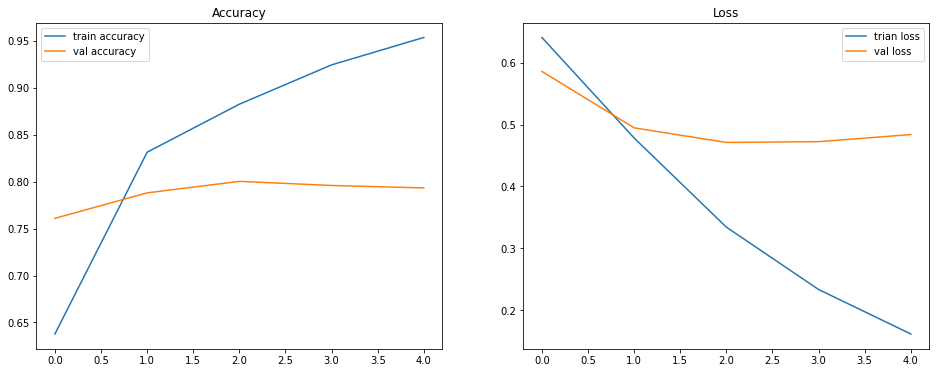

In [35]:
plot_loss_curves(model_1_history)

Dự đoán xác suất của `valid_text`, đối với vấn đề nhị phân, nếu xác suất <0.5 thì dự đoán là `0`, >0.5 thì dự đoán là `1`

In [36]:
model_1_pred_probs = model_1.predict(valid_text, verbose=1)
model_1_pred_probs

36/36 [==============================] - 0s 3ms/step


array([[0.02242202],
       [0.14217353],
       [0.7164327 ],
       ...,
       [0.9053507 ],
       [0.02762889],
       [0.15634298]], dtype=float32)

Sau khi có xác suất, chúng ta sẽ tiến hành làm tròn xác suất dự đoán để lấy giá trị `0` hoặc `1`

In [37]:
model_1_pred_labels = tf.round(tf.reduce_max(model_1_pred_probs,axis=1)).numpy()
model_1_pred_labels

array([0., 0., 1., ..., 1., 0., 0.], dtype=float32)

In [38]:
model_1_results = calculate_measure_results(valid_target, model_1_pred_labels)
model_1_results

{'accuracy': 0.7933450087565674,
 'f1-score': 0.7921158219410827,
 'precision': 0.7926893540478026,
 'recall': 0.7933450087565674}

Chúng ta đã có một bộ đánh giá hiệu suất mô hình `model_1`, điều cần làm là so sánh với mô hình cơ sở. Vì còn rất nhiều mô hình sẽ được xây dựng và đánh giá tương tự, nên chúng ta sẽ taọ hàm để tái sử dụng. 

In [39]:
def compare_baseline_to_new_model(baseline_results, new_model_results) : 
  for key, value in baseline_results.items() : 
    print(f"{key} Baseline  : {value:.3f}, new model : {new_model_results[key]:.3f}, diff : {(new_model_results[key] - value) :.3f}")

In [40]:
compare_baseline_to_new_model(baseline_results, model_1_results)

accuracy Baseline  : 0.786, new model : 0.793, diff : 0.007
precision Baseline  : 0.797, new model : 0.793, diff : -0.005
recall Baseline  : 0.786, new model : 0.793, diff : 0.007
f1-score Baseline  : 0.779, new model : 0.792, diff : 0.013


Có thể thấy kết quả đo lường của mô hình cơ sở và `model_1` khá tương đồng với nhau, độ chính xác chênh lệch không đáng kể.

Chúng ta có thể xem các trọng số trong layer `embedding` của mô hình đã học được gì bằng :

In [41]:
embed_weights = model_1.get_layer("embedding").get_weights()[0]
embed_weights,embed_weights.shape

(array([[-0.08770169, -0.0896696 , -0.01998542, ..., -0.01417057,
         -0.0407733 , -0.06835398],
        [-0.01682156,  0.04324749,  0.00779691, ...,  0.01894185,
          0.01890439,  0.04964003],
        [-0.0584141 , -0.03390941, -0.026013  , ..., -0.0097933 ,
         -0.03761758, -0.03427625],
        ...,
        [ 0.03307093,  0.03941299,  0.02966693, ...,  0.01946965,
         -0.0452813 ,  0.01724882],
        [-0.02470913,  0.04786363,  0.0462488 , ...,  0.02784437,
         -0.03830426, -0.03233713],
        [-0.01651341,  0.04750242,  0.0197933 , ...,  0.04229147,
         -0.03408734,  0.03911105]], dtype=float32), (30000, 128))

### Giới thiệu về Recurrent Neural Network (RNN) 

Đối với loạt thử nghiệm mô hình hóa tiếp theo của chúng ta sẽ sử dụng một loại mạng nơ-ron đặc biệt được gọi là Recurrent Neural Network (RNN) hay có thể dich nôm na là mạng nơ-ron tuần hoàn.

Tiền đề của một RNN rất đơn giản: sử dụng thông tin từ quá khứ để dự đoán trong tương lai (đây là nguồn gốc của thuật ngữ lặp lại). Nói cách khác, lấy một input (X) và tính toán một output (y) dựa trên tất cả các input trước đó.

Khái niệm này đặc biệt hữu ích khi xử lý các chuỗi như các đoạn văn bản bằng ngôn ngữ tự nhiên (chẳng hạn như Tweet, status).

Ví dụ : 'Cái bàn này rất đẹp, tôi đã mua nó tại cửa hàng gần nhà. Nhờ có nó, tôi làm việc rất thoải mái', từ 'nó' ở câu sau chúng ta có thể hiểu được nhờ bối cảnh câu trước đã gợi mở cho chúng ta về nó. 

Khi một RNN xem xét một chuỗi văn bản (đã ở dạng số), các đặc trưng mà nó học được liên tục cập nhật dựa trên thứ tự của chuỗi.

VD đơn giản : 

1. Massive earthquake last week, no? (Một trận động đất lớn vào cuối tuần qua, có phải không?)
2. No massive earthquake last week.(Không có trận động đất lớn nào vào cuối tuần qua)

Cả hai đều chứa những từ giống hệt nhau nhưng ý nghĩa khác nhau. Thứ tự của các từ xác định ý nghĩa (người ta có thể tranh luận các dấu câu cũng quyết định ý nghĩa nhưng vì đơn giản, chúng ta hãy tập trung vào các từ).

RNN có thể được sử dụng cho một số vấn đề dựa trên trình tự:
+ **One to one**: một input, một output (như đưa vào một hình ảnh để phân loại)
+ **One to many** : một input, nhiều output (như đưa vào một hình ảnh, tạo ra nhiều bối cảnh khác nhau)
+ **Many to one** : nhiều input, một output (như phân loại văn bản, taọ một trong Tweet, dự đoán có xảy ra thiên tai hay không)
+ **Many to many** : nhiều input, nhiều output (như máy dịch, dịch từ tiếng Anh sang tiếng Việt) hoặc giọng nói (tần sóng âm thanh là input, văn bản là output). 

Khi bạn gặp RNN, rất có thể bạn sẽ bắt gặp các biến thể của những thứ sau:
+ Long short-term memory cells (LSTMs) 
+ Gated recurrent units (GRU)
+ Bidirectional (chuyển tới và lùi theo một trình tự, từ trái sang phải và từ phải sang trái).

Để hiểu sâu hơn về những gì đang xảy ra đằng sau đoạn mã mà chúng ta sắp viết,  bạn nên tham khảo các nguồn sau : 

> 📖 **Nguồn tham khảo:**
> * [MIT Deep Learning Lecture on Recurrent Neural Networks](https://youtu.be/SEnXr6v2ifU) - giải thích nền tảng của RNN và giới thiệu LSTM.
> * [The Unreasonable Effectiveness of Recurrent Neural Networks](http://karpathy.github.io/2015/05/21/rnn-effectiveness/) by Andrej Karpathy - thể hiện sức mạnh của RNN với các ví dụ tạo ra các chuỗi khác nhau.
> * [Understanding LSTMs](https://colah.github.io/posts/2015-08-Understanding-LSTMs/) by Chris Olah - một cái nhìn chuyên sâu (và kỹ thuật) về cơ chế của ô LSTM, có thể là khối xây dựng RNN phổ biến nhất.




### Model 2 : LSTM

Chúng ta sẽ bắt đầu với LSTM một layer được tạo nên từ sức mạnh của RNN.

![](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/08-RNN-architecture-coloured-block-edition.png)

Mô hình của chúng ta sẽ có cấu trúc rất giống với `model_1`:

```
Input (text) -> Tokenize -> Embedding -> Layers -> Output (label probability)
```

Sự khác biệt chính là chúng ta sẽ thêm một layer LSTM giữa nhúng và output. 


In [42]:
inputs = layers.Input(shape=(1,), dtype="string")
token_vectors = text_vectorizer(inputs)
token_embeddings = text_embed(token_vectors)
x = layers.LSTM(units=128)(token_embeddings)
outputs = layers.Dense(1, activation="sigmoid")(x)

model_2 = Model(inputs, outputs)

`model_2` đã được khởi tạo, tiếp theo trước khi tiến hành train mô hình, chúng ta sẽ xem tổng quan kiến trúc của `model_2`. 

In [43]:
model_2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           3840000   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 3,971,713
Trainable params: 3,971,713
Non-trainable params: 0
_________________________________________________________________


Trước khi train mô hình hoặc có bất kỳ thay đổi trong kiến trúc của mô hình, chúng ta sẽ cần biên dịch lại mô hình

In [44]:
model_2.compile(
    loss="binary_crossentropy", 
    optimizer="adam",
    metrics=["accuracy"]
)

In [45]:
model_2_history = model_2.fit(
    train_text,
    train_target, 
    epochs=5, 
    validation_data=(valid_text, valid_target) ,
    callbacks=[
               create_tensorboard_callback(TENSORBOARD_DIR, "model_2_lstm")
    ]
)

Đã lưu tensorboard vào tensorboard/model_2_lstm/22092021-072954
Epoch 1/5
203/203 [==============================] - 9s 20ms/step - loss: 0.3306 - accuracy: 0.8632 - val_loss: 0.4945 - val_accuracy: 0.7977
Epoch 2/5
203/203 [==============================] - 3s 14ms/step - loss: 0.1525 - accuracy: 0.9456 - val_loss: 0.5962 - val_accuracy: 0.7758
Epoch 3/5
203/203 [==============================] - 3s 15ms/step - loss: 0.0794 - accuracy: 0.9717 - val_loss: 0.7042 - val_accuracy: 0.7391
Epoch 4/5
203/203 [==============================] - 3s 14ms/step - loss: 0.0551 - accuracy: 0.9824 - val_loss: 0.9082 - val_accuracy: 0.7434
Epoch 5/5
203/203 [==============================] - 3s 14ms/step - loss: 0.0329 - accuracy: 0.9896 - val_loss: 0.9536 - val_accuracy: 0.7653


In [46]:
model_2.evaluate(valid_text, valid_target)

36/36 [==============================] - 0s 5ms/step - loss: 0.9536 - accuracy: 0.7653


[0.9536372423171997, 0.7653239965438843]

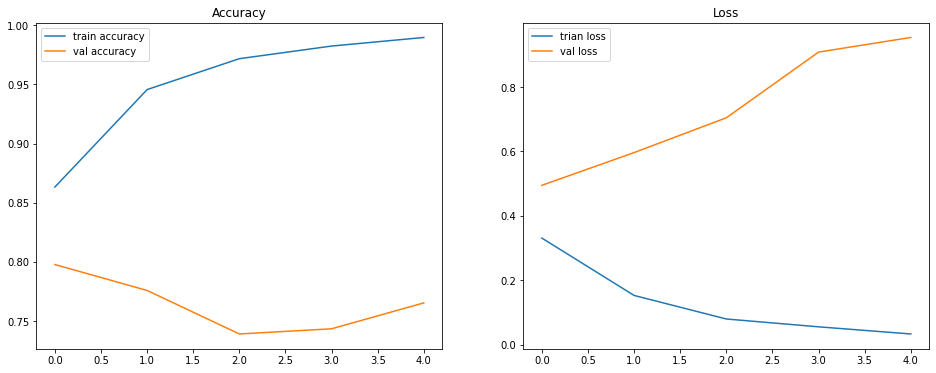

In [47]:
plot_loss_curves(model_2_history)

Dự đoán xác suất của `valid_text`: 


In [48]:
model_2_pred_probs = model_2.predict(valid_text, verbose=1) 
model_2_pred_probs

36/36 [==============================] - 1s 3ms/step


array([[7.1870154e-06],
       [2.8684214e-01],
       [4.8961064e-01],
       ...,
       [9.1709644e-01],
       [2.2750231e-04],
       [1.2442978e-02]], dtype=float32)

In [49]:
model_2_pred_labels = tf.round(tf.reduce_max(model_2_pred_probs,axis=1)).numpy()
model_2_pred_labels

array([0., 0., 0., ..., 1., 0., 0.], dtype=float32)

In [50]:
model_2_results = calculate_measure_results(valid_target, model_2_pred_labels)
model_2_results

{'accuracy': 0.7653239929947461,
 'f1-score': 0.7651409005317682,
 'precision': 0.7650004579648076,
 'recall': 0.7653239929947461}

So sánh các kết quả đo lường của `model_2` với mô hình cơ sở

In [51]:
compare_baseline_to_new_model(baseline_results, model_2_results)

accuracy Baseline  : 0.786, new model : 0.765, diff : -0.021
precision Baseline  : 0.797, new model : 0.765, diff : -0.032
recall Baseline  : 0.786, new model : 0.765, diff : -0.021
f1-score Baseline  : 0.779, new model : 0.765, diff : -0.014


Có thể thấy `model_2` đạt hiêu quả chính xác kém hơn so với mô hình cơ sở. 

### Model 3 : GRU 

Chúng ta sẽ sử dụng một biến thể thứ 2 của RNN là layer[`tensorflow.keras.layers.GRU()`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/GRU)để xây dựng mô hình dự đoán văn bản. Trình tự vẫn được lặp lại như `model_2` chỉ thay thế layer `LSTM` thành `GRU`. Cụ thể như sau : 

In [52]:
inputs = layers.Input(shape=(1,), dtype="string")
token_vectors = text_vectorizer(inputs)
token_embeddings = text_embed(token_vectors)
gru = layers.GRU(128)(token_embeddings)
outputs = layers.Dense(1, activation="sigmoid")(gru)

model_3 = Model(inputs, outputs)

In [53]:
model_3.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           3840000   
_________________________________________________________________
gru (GRU)                    (None, 128)               99072     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 3,939,201
Trainable params: 3,939,201
Non-trainable params: 0
_________________________________________________________________


In [54]:
model_3.compile(
    loss="binary_crossentropy", 
    optimizer="adam",
    metrics=["accuracy"]
)

In [55]:
model_3_history = model_3.fit(
    train_text, 
    train_target,
    epochs=5, 
    validation_data=(valid_text, valid_target),
    callbacks=[
               create_tensorboard_callback(TENSORBOARD_DIR, "model_3_gru")
    ]
)

Đã lưu tensorboard vào tensorboard/model_3_gru/22092021-073016
Epoch 1/5
203/203 [==============================] - 6s 19ms/step - loss: 0.1154 - accuracy: 0.9555 - val_loss: 0.7931 - val_accuracy: 0.7688
Epoch 2/5
203/203 [==============================] - 3s 13ms/step - loss: 0.0356 - accuracy: 0.9889 - val_loss: 1.1319 - val_accuracy: 0.7180
Epoch 3/5
203/203 [==============================] - 3s 14ms/step - loss: 0.0272 - accuracy: 0.9903 - val_loss: 0.9449 - val_accuracy: 0.7671
Epoch 4/5
203/203 [==============================] - 3s 14ms/step - loss: 0.0206 - accuracy: 0.9917 - val_loss: 0.8458 - val_accuracy: 0.7592
Epoch 5/5
203/203 [==============================] - 3s 15ms/step - loss: 0.0160 - accuracy: 0.9926 - val_loss: 0.9566 - val_accuracy: 0.7408


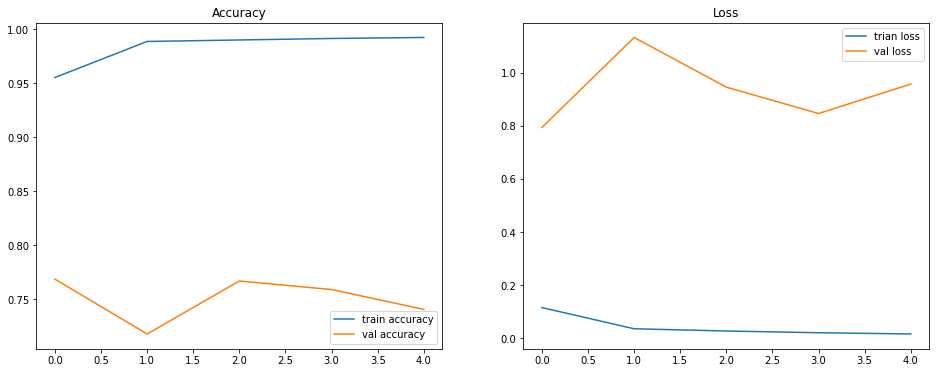

In [56]:
plot_loss_curves(model_3_history)

In [57]:
model_3_pred_probs = model_3.predict(valid_text, verbose=1)
model_3_pred_probs

36/36 [==============================] - 1s 3ms/step


array([[7.2790594e-05],
       [7.9159391e-01],
       [4.4220400e-01],
       ...,
       [9.7632897e-01],
       [1.1481475e-04],
       [4.7221583e-01]], dtype=float32)

In [58]:
model_3_pred_labels = tf.round(tf.reduce_max(model_3_pred_probs,axis=1)).numpy()
model_3_pred_labels


array([0., 1., 0., ..., 1., 0., 0.], dtype=float32)

In [59]:
model_3_results = calculate_measure_results(valid_target, model_3_pred_labels)
model_3_results

{'accuracy': 0.7408056042031523,
 'f1-score': 0.7419530994399646,
 'precision': 0.7464051890746005,
 'recall': 0.7408056042031523}

In [60]:
compare_baseline_to_new_model(baseline_results, model_3_results)

accuracy Baseline  : 0.786, new model : 0.741, diff : -0.046
precision Baseline  : 0.797, new model : 0.746, diff : -0.051
recall Baseline  : 0.786, new model : 0.741, diff : -0.046
f1-score Baseline  : 0.779, new model : 0.742, diff : -0.037


với GRU, `model_3` vẫn không thể dư đoán tốt bằng mô hình cơ sở. 

### Model 4 : Bidirectional-LSTM model (Mô hình LSTM hai chiều)

Một RNN tiêu chuẩn sẽ xử lý một trình tự từ trái sang phải, trái lại một RNN hai chiều sẽ xử lý trình tự từ trái sang phải và sau đó lại từ phải sang trái.

Theo trực giác, điều này có thể được hiểu như thể bạn đang đọc một câu lần đầu tiên theo cách thông thường (từ trái sang phải) nhưng vì lý do nào đó nó không có ý nghĩa nên bạn lướt qua các từ và quay lại chúng một lần nữa (phải sang trái). 

Trong thực tế, nhiều mô hình trình tự thường thấy và cải thiện hiệu suất khi sử dụng RNN hai chiều.

Tuy nhiên, việc cải thiện hiệu suất này thường đi kèm với cái giá là thời gian đào train hơn và tăng các tham train trong mô hình (vì mô hình đi từ trái sang phải và từ phải sang trái, số lượng thông số có thể train tăng gấp đôi).

Một lần nữa, TensorFlow giúp chúng ta bằng cách cung cấp  layer `tensorflow.keras.layers.Bidirectional()`. Chúng ta có thể sử dụng layer `bidirectional` để bọc các RNN hiện có của mình, ngay lập tức làm cho chúng có hai chiều.

In [61]:
inputs = layers.Input(shape=(1,), dtype="string")
token_vectors = text_vectorizer(inputs)
token_embeddings = text_embed(token_vectors)
token_bi_lstm = layers.Bidirectional(layers.LSTM(128))(token_embeddings)
outputs = layers.Dense(1, activation="sigmoid")(token_bi_lstm)

model_4 = Model(inputs, outputs)

In [62]:
model_4.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           3840000   
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               263168    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 4,103,425
Trainable params: 4,103,425
Non-trainable params: 0
_________________________________________________________________


In [63]:
model_4.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [64]:
model_4_history = model_4.fit(
    train_text,
    train_target, 
    epochs=5, 
    validation_data=(valid_text, valid_target), 
    callbacks=[
               create_tensorboard_callback(TENSORBOARD_DIR, "model_4_bi_lstm")
    ]
)

Đã lưu tensorboard vào tensorboard/model_4_bi_lstm/22092021-073041
Epoch 1/5
203/203 [==============================] - 9s 26ms/step - loss: 0.0640 - accuracy: 0.9847 - val_loss: 0.9054 - val_accuracy: 0.7347
Epoch 2/5
203/203 [==============================] - 4s 19ms/step - loss: 0.0230 - accuracy: 0.9912 - val_loss: 0.9159 - val_accuracy: 0.7653
Epoch 3/5
203/203 [==============================] - 4s 19ms/step - loss: 0.0206 - accuracy: 0.9921 - val_loss: 0.9205 - val_accuracy: 0.7469
Epoch 4/5
203/203 [==============================] - 4s 19ms/step - loss: 0.0134 - accuracy: 0.9934 - val_loss: 1.2470 - val_accuracy: 0.7601
Epoch 5/5
203/203 [==============================] - 4s 19ms/step - loss: 0.0145 - accuracy: 0.9934 - val_loss: 1.1426 - val_accuracy: 0.7504


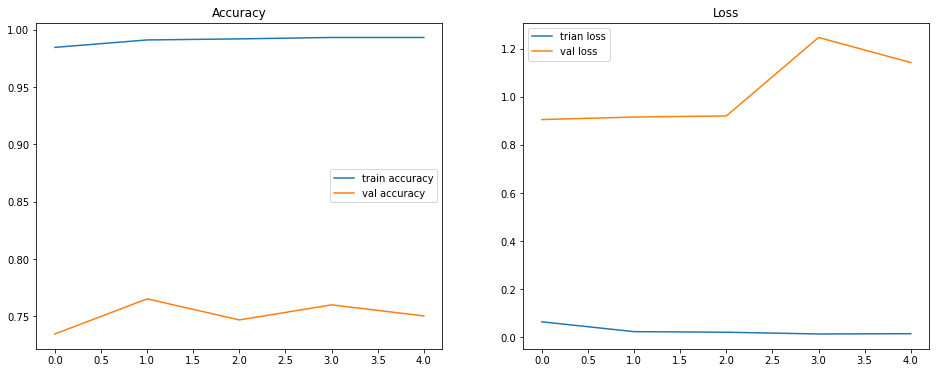

In [65]:
plot_loss_curves(model_4_history)

In [66]:
model_4_pred_probs = model_4.predict(valid_text, verbose=1)
model_4_pred_probs

36/36 [==============================] - 1s 5ms/step


array([[9.9363329e-05],
       [4.8480147e-01],
       [1.6339307e-01],
       ...,
       [1.4854184e-02],
       [1.7129823e-04],
       [1.9157290e-01]], dtype=float32)

In [67]:
model_4_pred_labels = tf.round(tf.reduce_max(model_4_pred_probs,axis=1)).numpy()
model_4_pred_labels

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [68]:
model_4_results = calculate_measure_results(valid_target, model_4_pred_labels)
model_4_results

{'accuracy': 0.7504378283712785,
 'f1-score': 0.7499973559906006,
 'precision': 0.7497534359937165,
 'recall': 0.7504378283712785}

In [69]:
compare_baseline_to_new_model(baseline_results, model_4_results)

accuracy Baseline  : 0.786, new model : 0.750, diff : -0.036
precision Baseline  : 0.797, new model : 0.750, diff : -0.048
recall Baseline  : 0.786, new model : 0.750, diff : -0.036
f1-score Baseline  : 0.779, new model : 0.750, diff : -0.029


### Model 5: 1D Convolutional Neural Network

Trước khi chúng ta xây dựng mô hình CNN 1 chiều đầy đủ, chúng ta sẽ mô phỏng quá trình thực thực hiện của mô hình khi đưa dữ liệu vào. 

Trước tiên, chúng ta sẽ tạo một bản nhúng của một mẫu văn bản và thử nghiệm chuyển nó qua lớp `Conv1D()` và lớp `GlobalMaxPool1D()`.


In [70]:
text_embeddings_example = text_embed(text_vectorizer([random_sentence]))
conv_1d = layers.Conv1D(filters=32, kernel_size=5, activation="relu")
conv_1d_output = conv_1d(text_embeddings)
max_pool = layers.GlobalMaxPool1D()
max_pool_outputs = max_pool(conv_1d_output)

text_embeddings_example.shape, conv_1d_output.shape, max_pool_outputs.shape

(TensorShape([1, 15, 128]),
 TensorShape([None, 11, 32]),
 TensorShape([None, 32]))

Lưu ý các hình dạng outputs của mỗi layers. 

Trong layer nhúng có kích thước hình dạng output là `input_length = 15` và `output_dim = 128`. 

Đến layer CNN 1 chiều, output của nó đã được nén nội tuyến với các tham số trong nó. Và điều tương tự cũng xảy ra đối với output của layer `max_pool`. 

Văn bản của chúng ta bắt đầu dưới dạng một chuỗi nhưng được chuyển đổi thành vectơ đặc trưng có độ dài 64 thông qua các bước chuyển đổi khác nhau (từ mã hóa đến nhúng sang tích chập 1 chiều thành nhóm tối đa).

OK, chúng ta sẽ tiến hành đặt các layer trên lại với nhau để xây dựng mô hình 


In [71]:
inputs = layers.Input(shape=(1,), dtype="string") 
token_vectors = text_vectorizer(inputs)
token_embeddings = text_embed(token_vectors)
token_conv1d = layers.Conv1D(filters=128, kernel_size=5, activation="relu")(token_embeddings)
token_max_pool = layers.GlobalMaxPool1D()(token_conv1d)
outputs = layers.Dense(1, activation="sigmoid")(token_max_pool)

model_5 = Model(inputs, outputs)

In [72]:
model_5.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           3840000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 11, 128)           82048     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 3,922,177
Trainable params: 3,922,177
Non-trainable params: 0
_________________________________________________

Lưu ý rằng số lượng các tham số có thể train cho lớp tích chập 1 chiều tương tự như của lớp LSTM trong mô `model_2`. 



In [73]:
model_5.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [74]:
model_5_history = model_5.fit(
    train_text,
    train_target, 
    epochs=5, 
    validation_data=(valid_text, valid_target),
    callbacks=[
               create_tensorboard_callback(TENSORBOARD_DIR, "model_5_conv1d")
    ]
)

Đã lưu tensorboard vào tensorboard/model_5_conv1d/22092021-073128
Epoch 1/5
203/203 [==============================] - 30s 14ms/step - loss: 0.0685 - accuracy: 0.9824 - val_loss: 1.0182 - val_accuracy: 0.7469
Epoch 2/5
203/203 [==============================] - 2s 11ms/step - loss: 0.0254 - accuracy: 0.9915 - val_loss: 1.0490 - val_accuracy: 0.7539
Epoch 3/5
203/203 [==============================] - 2s 11ms/step - loss: 0.0199 - accuracy: 0.9917 - val_loss: 1.1127 - val_accuracy: 0.7426
Epoch 4/5
203/203 [==============================] - 2s 10ms/step - loss: 0.0183 - accuracy: 0.9929 - val_loss: 1.1061 - val_accuracy: 0.7609
Epoch 5/5
203/203 [==============================] - 2s 10ms/step - loss: 0.0174 - accuracy: 0.9929 - val_loss: 1.1109 - val_accuracy: 0.7513


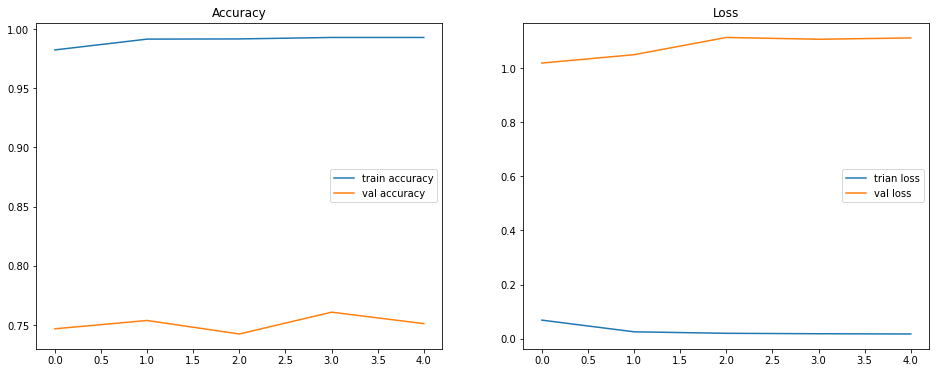

In [75]:
plot_loss_curves(model_5_history)

In [76]:
model_5_pred_probs= model_5.predict(valid_text,verbose=1)
model_5_pred_probs

36/36 [==============================] - 0s 3ms/step


array([[6.0055079e-03],
       [4.0842474e-01],
       [1.3958932e-03],
       ...,
       [8.6612326e-01],
       [9.8911905e-06],
       [4.9681973e-02]], dtype=float32)

In [77]:
model_5_pred_labels = tf.round(tf.reduce_max(model_5_pred_probs, axis=1)).numpy()
model_5_pred_labels

array([0., 0., 0., ..., 1., 0., 0.], dtype=float32)

In [78]:
model_5_results = calculate_measure_results(valid_target, model_5_pred_labels)
model_5_results

{'accuracy': 0.7513134851138353,
 'f1-score': 0.7511194617575454,
 'precision': 0.7509672620703818,
 'recall': 0.7513134851138353}

In [79]:
compare_baseline_to_new_model(baseline_results, model_5_results)

accuracy Baseline  : 0.786, new model : 0.751, diff : -0.035
precision Baseline  : 0.797, new model : 0.751, diff : -0.046
recall Baseline  : 0.786, new model : 0.751, diff : -0.035
f1-score Baseline  : 0.779, new model : 0.751, diff : -0.028


### Model 6: TensorFlow Hub Pretrained Feature Extractor

Đối với tất cả mô hình deep learning trước đây, chúng ta đều tự tây sử dụng các bản nhúng để xây dựng và train mô hình. Tuy nhiên, khả năng học của mô hình chỉ dừng tại mức 75%-80%. Trong quá khứ thiên tai, thảm họa là chủ đề luôn được các nhà khoa học quan tâm, họ cũng đã xây dựng những mô hình dự đoán để phục vụ cho quá trình phân tích trên lượng dữ liệu khổng lồ mà họ đã thu thập. Và đương nhiên, mô hình mà họ đã train trước đó cũng có độ phức tạp cao hơn nhiều so với những mô hình của chúng ta, vì thế khả năng mô hình học của chúng có thể sẽ rất tốt. 

Đối với mô hình tiếp theo của, thay vì sử dụng layer nhúng mà chúng ta tạo ra, chúng ta sẽ thay thế nó bằng một layer nhúng được train trước đó.

Đặc biệt hơn, chúng ta sẽ sử dụng [Universal Sentence Encoder](https://www.aclweb.org/anthology/D18-2029.pdf) từ [TensorFlow Hub](https://tfhub.dev/google/universal-sentence-encoder/4)(một nguồn tài nguyên tuyệt vời chứa rất nhiều tài nguyên mô hình được train trước cho nhiều nhiệm vụ khác nhau).

> 🔑 **Lưu ý:** Có nhiều tùy chọn nhúng văn bản tiền xử lý trước khác nhau trên TensorFlow Hub, tuy nhiên, một số yêu cầu mức xử lý trước văn bản khác với các tùy chọn khác. Tốt nhất hãy thử nghiệm với một số và xem cái nào phù hợp nhất với trường hợp sử dụng của bạn.

Sự khác biệt chính giữa layer nhúng mà chúng ta đã tạo và Universal Sentence Encode là thay vì tạo kiểu nhúng cấp độ từ (word-level embedding), Universal Sentence Encode lại tạo ra một kiểu nhúng toàn bộ cấp độ câu. (sentence-level embedding).

Layer nhúng của chúng ta cũng xuất ra một vectơ 128 chiều cho mỗi từ, trong khi đó, Universal Sentence Encode xuất ra một vectơ 512 chiều cho mỗi câu.


![](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/08-USE-tensorflow-hub-encoder-decoder-model.png)
*Mô hình trình trích xuất đặc tính mà chúng ta đang xây dựng thông qua mô hình **bộ mã hóa / bộ giải mã**.*

> 🔑 **Lưu ý:** Một **bộ mã hóa (encoder)** là tên của một mô hình chuyển đổi dữ liệu thô như văn bản thành biểu diễn số (vectơ đặc trưng), một **bộ giải mã (decoder)** giúp chuyển đổi dữ liệu biểu diễn dưới dạng số thành output như mong muốn.

Bạn có thể tải trong mô-đun TensorFlow Hub bằng cách sử dụng [`hub.load()`](https://www.tensorflow.org/hub/api_docs/python/hub/load) và truyền vào URL đích cho mô-đun mà chúng ta muốn sử dụng, trong trường hợp của chúng ta là https://tfhub.dev/google/universal-sentence-encoder/4





In [80]:
import tensorflow_hub as hub

pretrained_embedding = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

Mã nhúng được train trước đã được load xuống, chúng ta sẽ thử nghiệm với một text bất kỳ trong train_text

In [81]:
import random 

random_sentence = random.choice(train_text)
print(f"Text ban đầu : {random_sentence}")
print(f"Text sau khi được đưa qua trình nhúng : {pretrained_embedding([random_sentence])[0][:75]}")
print(f"Kích thước của text sau khi đưa qua trình nhúng: {pretrained_embedding([random_sentence]).shape}")

Text ban đầu : WWI WWII JAPANESE ARMY NAVY MILITARY JAPAN LEATHER WATCH WAR MIDO WW1 2 - Full read by eBay http://t.co/F9j3l2Yjl4 http://t.co/mwwWOWCayO
Text sau khi được đưa qua trình nhúng : [-0.03044281  0.01581856  0.00134035  0.00863503 -0.00559442  0.04981313
  0.01506585  0.05701551 -0.030074   -0.02970834  0.06973495 -0.05663311
  0.06022958 -0.04602449  0.04764451  0.02369825 -0.01512087  0.02305916
 -0.00713952  0.01581034  0.02766969  0.03719183  0.03417041  0.02941948
  0.04948907  0.06511479  0.034182   -0.02813621 -0.02527089 -0.01344577
  0.0650821  -0.0651933   0.06065701 -0.01511771  0.06313758  0.07080024
 -0.00198632 -0.06720072 -0.04833446 -0.06668052  0.02474172 -0.06294521
  0.00654026 -0.01747344  0.03193644 -0.02624837  0.02046614  0.04166235
 -0.02762615  0.02517514 -0.04471124 -0.00645435 -0.06003043 -0.00998051
  0.06492233 -0.03638563 -0.03932678  0.00576998 -0.04325168 -0.04816242
 -0.00121299  0.06398901  0.04804118 -0.03234267  0.05050661 -0.02753097
  0.

Việc nhúng các câu vào Universal Sentence Encoder (USE) để mã hóa chúng thành vector 512 chiều sẽ giúp cho mô hình có thể học được các đặc trưng từ bản nhúng đó. 

Chúng ta có thể chuyển đổi mô-đun TensorFlow Hub USE thành một layer Keras bằng cách sử dụng [`hub.KerasLayer`](https://www.tensorflow.org/hub/api_docs/python/hub/KerasLayer).




In [88]:
universal_sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",trainable=False)

In [86]:
inputs = layers.Input(shape=(), dtype="string")
tf_hub_embeddings = universal_sentence_encoder_layer(inputs)
x = layers.Dense(128,activation="relu")(tf_hub_embeddings)
outputs = layers.Dense(1, activation="sigmoid")(x)

model_6 = Model(inputs, outputs)

In [87]:
model_6.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None,)]                 0         
_________________________________________________________________
keras_layer_1 (KerasLayer)   (None, 512)               256797824 
_________________________________________________________________
dense_7 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 129       
Total params: 256,863,617
Trainable params: 65,793
Non-trainable params: 256,797,824
_________________________________________________________________


In [89]:
model_6.compile(
    loss="binary_crossentropy" ,
    optimizer="adam", 
    metrics=["accuracy"]
)

In [90]:
model_6_history = model_6.fit(
    train_text,
    train_target, 
    epochs=5, 
    validation_data=(valid_text, valid_target),
    callbacks=[
               create_tensorboard_callback(TENSORBOARD_DIR, "model_6_tf_hub_pretrained_feature_extractor")
    ]
)

Đã lưu tensorboard vào tensorboard/model_6_tf_hub_pretrained_feature_extractor/22092021-074027
Epoch 1/5
203/203 [==============================] - 12s 44ms/step - loss: 0.4861 - accuracy: 0.7892 - val_loss: 0.4321 - val_accuracy: 0.8161
Epoch 2/5
203/203 [==============================] - 4s 21ms/step - loss: 0.4105 - accuracy: 0.8169 - val_loss: 0.4177 - val_accuracy: 0.8161
Epoch 3/5
203/203 [==============================] - 4s 21ms/step - loss: 0.3946 - accuracy: 0.8243 - val_loss: 0.4195 - val_accuracy: 0.8187
Epoch 4/5
203/203 [==============================] - 4s 21ms/step - loss: 0.3838 - accuracy: 0.8312 - val_loss: 0.4206 - val_accuracy: 0.8161
Epoch 5/5
203/203 [==============================] - 4s 21ms/step - loss: 0.3730 - accuracy: 0.8365 - val_loss: 0.4144 - val_accuracy: 0.8292


In [91]:
model_6.evaluate(valid_text, valid_target)

36/36 [==============================] - 1s 18ms/step - loss: 0.4144 - accuracy: 0.8292


[0.414387583732605, 0.8292469382286072]

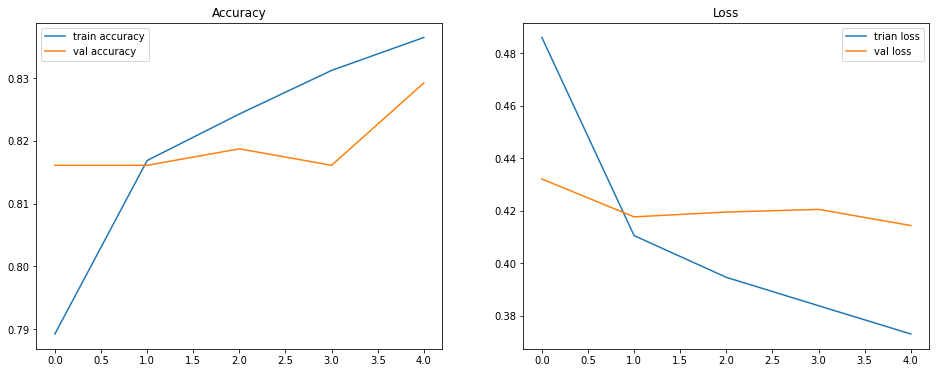

In [92]:
plot_loss_curves(model_6_history)

Các đường `train` và `valid` của 2 biểu đồ trong mô hình có vẻ tốt hơn so với những mô hình trước. 

Chúng ta sẽ đánh giá mô hình bằng 4 phương pháp, nhưng trước tiên cần phải dự đoán label của dữ liệu `valid`. 

In [93]:
model_6_pred_probs = model_6.predict(valid_text,verbose=1)
model_6_pred_probs

36/36 [==============================] - 1s 15ms/step


array([[0.08179197],
       [0.09328664],
       [0.3607355 ],
       ...,
       [0.81709486],
       [0.05123212],
       [0.21489322]], dtype=float32)

In [94]:
model_6_pred_labels = tf.round(tf.reduce_max(model_6_pred_probs, axis=1)).numpy()
model_6_pred_labels

array([0., 0., 0., ..., 1., 0., 0.], dtype=float32)

In [95]:
model_6_results = calculate_measure_results(valid_target, model_6_pred_labels)
model_6_results

{'accuracy': 0.829246935201401,
 'f1-score': 0.8279988975266545,
 'precision': 0.8294144974743118,
 'recall': 0.829246935201401}

In [96]:
compare_baseline_to_new_model(baseline_results, model_6_results)

accuracy Baseline  : 0.786, new model : 0.829, diff : 0.043
precision Baseline  : 0.797, new model : 0.829, diff : 0.032
recall Baseline  : 0.786, new model : 0.829, diff : 0.043
f1-score Baseline  : 0.779, new model : 0.828, diff : 0.049


So với mô hình cơ sở, có thể thấy `model_6` sử dụng layer nhúng đã được train trước đó có khả năng dự đoán tốt hơn khá nhiều (~4%).

### Model 7: Same as model 6 with 10% of training data

Một trong những ưu điểm của việc sử dụng những mô hình đã được train trước đó, chẳng hạn như trong trường hợp của chúng ta là các layer nhúng trong USE thì có khả năng thu lại kết quả dự đoán khá tốt dù chỉ train trên lượng dữ liệu tương đối nhỏ. Để kiểm chứng cho điều này, chúng ta sẽ sử dụng chỉ với 10% dữ liệu train để đưa vào mô hình train xem nó có thực sự hiệu quả như vậy không? 

Đầu tiên, chúng ta sẽ lấy 10% dữ liệu train 

In [97]:
train_text_10_percent, train_text_90_percent, train_target_10_percent, train_target_90_percent = train_test_split(train_text, 
                                                                                                                  train_target, 
                                                                                                                  train_size=0.1, 
                                                                                                                  random_state=42)
train_text_10_percent.shape, train_target_10_percent.shape

((647,), (647,))

Chúng ta sẽ sử dụng 10% (647) dữ liệu train để tiến hành train trong `model_6`. Nhưng chúng ta sẽ tạo `model_7` bằng cách nhân bản từ `model_6` để nó không lấy các trọng số mà `model_6` đã học. 

In [98]:
model_7 = tf.keras.models.clone_model(model_6)
model_7.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None,)]                 0         
_________________________________________________________________
keras_layer_1 (KerasLayer)   (None, 512)               256797824 
_________________________________________________________________
dense_7 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 129       
Total params: 256,863,617
Trainable params: 65,793
Non-trainable params: 256,797,824
_________________________________________________________________


`model_7` đã được nhân bản lại kiến trúc của `model_6`. Chúng ta sẽ tiến hành compile và bắt đầu train mô hình. Lưu ý, mọi thứ vẫn giống với `model_6`, chỉ thay đổi dữ liệu train mô hình bằng 10% dữ liệu train mà chúng ta đã tạo ở trên. 

In [99]:
model_7.compile(
    loss="binary_crossentropy", 
    optimizer="adam", 
    metrics=["accuracy"]
)

In [102]:
model_7_history = model_7.fit(
    train_text_10_percent, 
    train_target_10_percent, 
    epochs=5, 
    validation_data=(valid_text, valid_target), 
    callbacks=[
               create_tensorboard_callback(TENSORBOARD_DIR, "model_7_tf_hub_pretrained_embeddings_10_percent_training_data")
    ]
)

Đã lưu tensorboard vào tensorboard/model_7_tf_hub_pretrained_embeddings_10_percent_training_data/22092021-075953
Epoch 1/5
21/21 [==============================] - 6s 155ms/step - loss: 0.6629 - accuracy: 0.7218 - val_loss: 0.6293 - val_accuracy: 0.7793
Epoch 2/5
21/21 [==============================] - 1s 49ms/step - loss: 0.5696 - accuracy: 0.8300 - val_loss: 0.5572 - val_accuracy: 0.7837
Epoch 3/5
21/21 [==============================] - 1s 45ms/step - loss: 0.4813 - accuracy: 0.8315 - val_loss: 0.5007 - val_accuracy: 0.7881
Epoch 4/5
21/21 [==============================] - 1s 44ms/step - loss: 0.4180 - accuracy: 0.8377 - val_loss: 0.4766 - val_accuracy: 0.7960
Epoch 5/5
21/21 [==============================] - 1s 44ms/step - loss: 0.3799 - accuracy: 0.8485 - val_loss: 0.4654 - val_accuracy: 0.7933


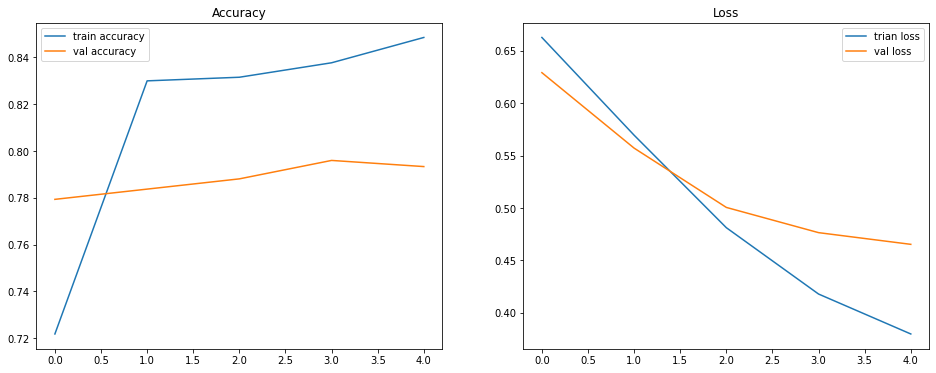

In [104]:
plot_loss_curves(model_7_history)

In [105]:
model_7_pred_probs = model_7.predict(valid_text,verbose=1)
model_7_pred_probs

36/36 [==============================] - 1s 15ms/step


array([[0.09064204],
       [0.09403508],
       [0.67025065],
       ...,
       [0.83671564],
       [0.06275372],
       [0.14773996]], dtype=float32)

In [107]:
model_7_pred_labels = tf.round(tf.reduce_max(model_7_pred_probs, axis=1)).numpy()
model_7_pred_labels

array([0., 0., 1., ..., 1., 0., 0.], dtype=float32)

In [108]:
model_7_results = calculate_measure_results(valid_target, model_7_pred_labels)
model_7_results

{'accuracy': 0.7933450087565674,
 'f1-score': 0.7926266094067003,
 'precision': 0.7926223158922845,
 'recall': 0.7933450087565674}

In [110]:
compare_baseline_to_new_model(baseline_results, model_7_results)

accuracy Baseline  : 0.786, new model : 0.793, diff : 0.007
precision Baseline  : 0.797, new model : 0.793, diff : -0.005
recall Baseline  : 0.786, new model : 0.793, diff : 0.007
f1-score Baseline  : 0.779, new model : 0.793, diff : 0.014


Chỉ với 10% dữ liệu train, `model_7` cũng đã đánh bại mô hình cơ sở. 

## 6. So sánh hiệu quả của các mô hình

Chúng ta đã trải qua một chặng đường khá dài với 8 mô hình, bây giờ là lúc chúng ta cần đánh giá lại khả năng dự đoán trên tập dữ liệu kiểm định của từng mô hình để có cái nhìn rõ ràng hơn về hiệu quả từ các phương pháp xây dựng mô hình khác nhau trên dữ liệu train.  



In [111]:
all_models_results = pd.DataFrame({
    "baseline_model" : baseline_results, 
    "model_1_simple_dense" : model_1_results, 
    "model_2_RNN_LSTM" : model_2_results, 
    "model_3_RNN_GRU" : model_3_results, 
    "model_4_RNN_Bi_LSTM" : model_4_results,
    "model_5_CNN_Conv1D" : model_5_results, 
    "model_6_TF_Hub_USE" : model_6_results, 
    "model_7_TF_Hub_USE_10_percent_data" : model_7_results
})

all_models_results

,baseline_model,model_1_simple_dense,model_2_RNN_LSTM,model_3_RNN_GRU,model_4_RNN_Bi_LSTM,model_5_CNN_Conv1D,model_6_TF_Hub_USE,model_7_TF_Hub_USE_10_percent_data
accuracy,0.786340,0.793345,0.765324,0.740806,0.750438,0.751313,0.829247,0.793345
precision,0.797449,0.792689,0.765000,0.746405,0.749753,0.750967,0.829414,0.792622
recall,0.786340,0.793345,0.765324,0.740806,0.750438,0.751313,0.829247,0.793345
f1-score,0.779110,0.792116,0.765141,0.741953,0.749997,0.751119,0.827999,0.792627


In [112]:
all_models_results = all_models_results.transpose()
all_models_results

,accuracy,precision,recall,f1-score
baseline_model,0.786340,0.797449,0.786340,0.779110
model_1_simple_dense,0.793345,0.792689,0.793345,0.792116
model_2_RNN_LSTM,0.765324,0.765000,0.765324,0.765141
model_3_RNN_GRU,0.740806,0.746405,0.740806,0.741953
model_4_RNN_Bi_LSTM,0.750438,0.749753,0.750438,0.749997
model_5_CNN_Conv1D,0.751313,0.750967,0.751313,0.751119
model_6_TF_Hub_USE,0.829247,0.829414,0.829247,0.827999
model_7_TF_Hub_USE_10_percent_data,0.793345,0.792622,0.793345,0.792627


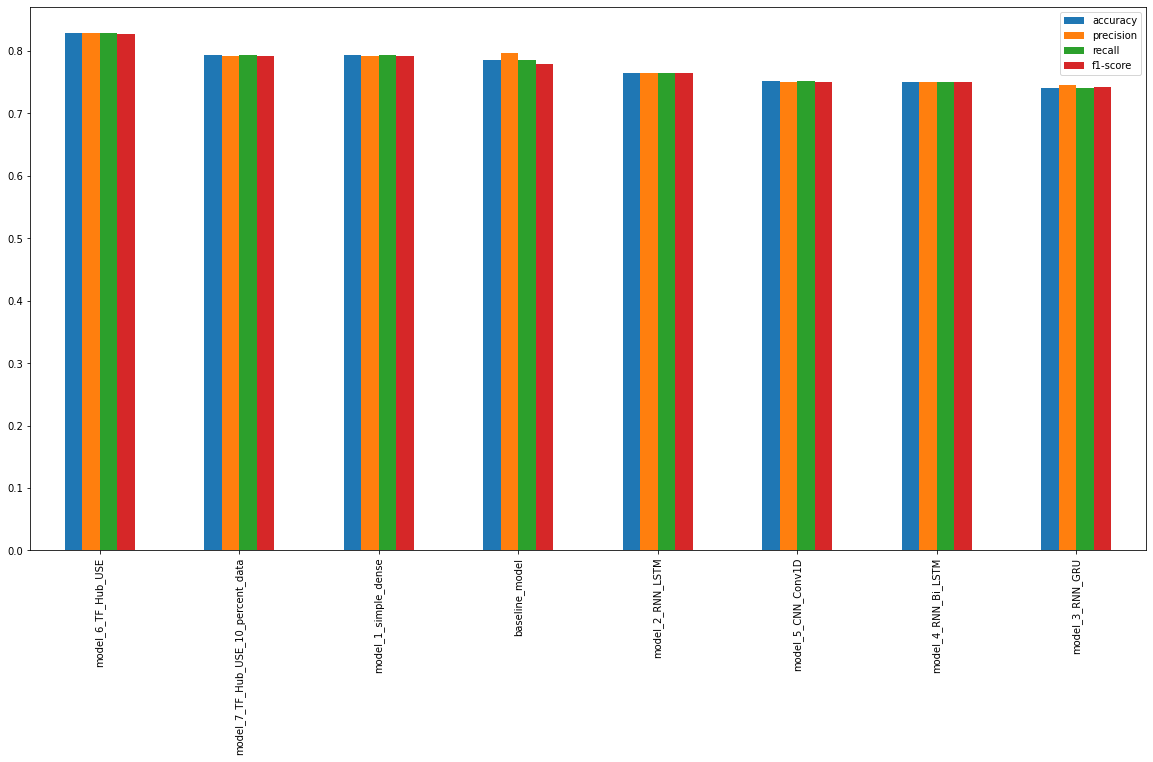

In [121]:
all_models_results.sort_values(by=["f1-score", "accuracy"],ascending=False).plot.bar(figsize=(20,10)).legend(bbox_to_anchor=([1,1]))

Có thể thấy `model_6_TF_Hub_USE` sử dụng mô hình nhúng đã được trước đó đạt được hiệu quả tốt nhất với mọi phương pháp đánh giá. Cùng một phương pháp trên nhưng với 10% dữ liệu train, `model_7_TF_Hub_USE_10_percent_data` lại xếp chỉ sau chính tiền thân của nó.

Ngoài ra, chúng ta cũng có thể dung Tensorboard để so sánh các mô hình. 

In [123]:
!tensorboard dev upload --logdir tensorboard \
--name "NLP models experiments" \
--description "A series of different NLP modellings experiments with various models"
--one_shot

2021-09-22 08:45:17.848330: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-22 08:45:17.873503: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-22 08:45:17.873987: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

tensorboard

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Poli

NameError: ignored

## 7. Tìm những dự đoán sai lớn nhất

Một trong những cách tốt nhất để kiểm tra dữ liệu của bạn là sắp xếp các dự đoán của mô hình và tìm các mẫu mà nó sai nhiều nhất, nghĩa là, những dự đoán nào có xác suất dự đoán cao nhưng hóa ra lại sai.

Để làm cho mọi thứ trở nên trực quan, chúng ta hãy lấy các class và xác suất dự đoán của mô hình hoạt động tốt nhất cùng với các mẫu từ dữ liệu kiểm đinhvà kết hợp chúng trong một DataFrame.

+ Nếu mô hình tốt nhất của chúng ta vẫn không hoàn hảo, thì những mẫu nào là lại bị sai?
+ Mẫu nào sai lớn nhất ?
+ Có một số label bị sai? Ví dụ. mô hình làm đúng nhưng label thực sự không phản ánh đúng điều này. 

In [133]:
val_df = pd.DataFrame({
    "text" : valid_text,
    "target" : valid_target,
    "predict label" : model_6_pred_labels.astype("int"), 
    "predict prob" : tf.squeeze(model_6_pred_probs).numpy(), 
})

val_df

,text,target,predict label,predict prob
0,So you have a new weapon that can cause un-ima...,1,0,0.081792
1,The f$&amp;@ing things I do for #GISHWHES Just...,0,0,0.093287
2,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1,0,0.360736
3,Aftershock back to school kick off was great. ...,0,0,0.215357
4,in response to trauma Children of Addicts deve...,0,0,0.205807
...,...,...,...,...
1137,??\nWarfighting Robots Could Reduce Civilian C...,1,1,0.816532
1138,@fewmoretweets all lives matter. Just not a fa...,1,1,0.569679
1139,WomanÛªs GPS app guides rescuers to injured b...,1,1,0.817095
1140,Tonight It's Going To Be Mayhem @ #4PlayThursd...,0,0,0.051232


In [138]:
most_wrong = val_df[val_df["target"] != val_df["predict label"]].sort_values("predict prob", ascending=False)
most_wrong[:20]

,text,target,predict label,predict prob
1005,@adorableappple No reported flooding po in the...,0,1,0.984144
656,Russian customs destroyed a total of 319 tons ...,0,1,0.975993
428,HereÛªs how media in Pakistan covered the cap...,0,1,0.945666
608,USW: 'The damage from abandoning the deal coul...,0,1,0.936528
978,Video Captures Man Removing American Flag From...,0,1,0.932455
158,Over half of poll respondents worry nuclear di...,0,1,0.925400
688,Upheaval high note for bush opera http://t.co/...,0,1,0.910114
1070,@writebothfists It got pretty windy here too.....,0,1,0.907004
1127,China's Stock Market Crash: Are There Gems In ...,0,1,0.883140
864,Who is Tomislav Salopek the Islamic State's Mo...,0,1,0.874839


## 8. Dự đoán với dữ liệu test

Từ đầu đến giờ, chúng ta vẫn chưa sử dụng đến `test_df`, bây giờ là lúc chúng ta sẽ dự đoán với dữ liệu không có label này. 

In [147]:
test_df

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [148]:
test_pred_probs = model_6.predict(test_df["text"], verbose=1)
test_pred_probs

102/102 [==============================] - 2s 15ms/step


array([[0.6626104 ],
       [0.905122  ],
       [0.7989303 ],
       ...,
       [0.94086695],
       [0.5459349 ],
       [0.6408198 ]], dtype=float32)

In [150]:
test_pred_labels = tf.round(tf.reduce_max(test_pred_probs,axis=1)).numpy()
test_pred_labels

array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)

In [155]:
test_results = pd.DataFrame({
    "text" : test_df["text"], 
    "predict" : test_pred_labels, 
    "preduct prob" : tf.squeeze(test_pred_probs)
})

test_results[:20]

,text,predict,preduct prob
0,Just happened a terrible car crash,1.0,0.662610
1,"Heard about #earthquake is different cities, s...",1.0,0.905122
2,"there is a forest fire at spot pond, geese are...",1.0,0.798930
3,Apocalypse lighting. #Spokane #wildfires,1.0,0.952701
4,Typhoon Soudelor kills 28 in China and Taiwan,1.0,0.975133
5,We're shaking...It's an earthquake,1.0,0.615253
6,They'd probably still show more life than Arse...,0.0,0.072799
7,Hey! How are you?,0.0,0.047096
8,What a nice hat?,0.0,0.069280
9,Fuck off!,0.0,0.049423
